# Basic



In [ ]:
import numpy as np
import math
#ROM_lookup provides values of constant required for each coordinate system based on iteration count
hyperbolic=-1
linear=0
circular=1
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return math.degrees(math.atan(2**(-1*iteration)))
    elif (coordinate == linear):
        #print("linear mode return",2**(-1*iteration),"inputs iteration",iteration)
        return 2**(-1*iteration)
    elif (coordinate == hyperbolic):
        return (math.atanh(2**(-1*iteration)))
#Rotation_mode returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(x, y, z, coordinate, iterations,division=0):
    a = 0.607252935;   # = 1/K

    x_val_list = []
    y_val_list = []
    z_val_list = []

    i = 0;                  # Keeps count on number of iterations

    current_x = x         # Value of X on ith iteration
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration

    di = 0

    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0

    flag = 0

    if (iterations > 0):
        while (i < iterations):
            if division ==0:
              if (current_z < 0):
                  di = -1
              else:
                  di = +1
            else:
              if ((current_x < 0) == (current_y < 0)):
                  di = -1
              else:
                  di = 1
            next_z = current_z - di * ROM_lookup(i, coordinate)

            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)

            current_x = next_x # cosh in hyperbolic
            current_y = next_y # sinh in hyperbolic
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)


            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list }


In [ ]:
!conda install -c francof2a fxpmath
!pip install fxpmath

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fxpmath: filename=fxpmath-0.4.9-py3-none-any.whl size=35222 sha256=3ddbe08af017ef66d9df180d265e6fb31eed83f532796b6b459f9ce70c911cfc
  Stored in directory: /root/.cache/pip/wheels/42/f9/d8/93139102960a16b69e0c763f1010b7b206c8853e2d6497fa96
Successfully built fxpmath


In [ ]:
#!pip install fxpmath
#!conda activate cordic_p3_11
# 8 bit fxp - 1-2-5
# 16 bit fxp -  1-3-12
# 32 bit fxp - 1-5-26
from fxpmath import Fxp

x = Fxp(-7.25)      # create fxp variable with value 7.25
x.info()
x = Fxp(-7.25, signed=True, n_word=16, n_frac=8)

print(x)

	dtype		=	fxp-s6/2
	Value		=	-7.25

-7.25


In [ ]:
a=Fxp(1.5, signed=True, n_word=8, n_frac=5)
print(a)

1.5


In [ ]:
x(10.75)            # the simpliest way
x.set_val(2.125)    # another option
x

fxp-s16/8(2.125)

In [ ]:
# variable to store a result
# Fxp as operands
x1 = Fxp(-7.25, signed=True, n_word=16, n_frac=8)
x2 = Fxp(1.5, signed=True, n_word=16, n_frac=8)
x3 = Fxp(-0.5, signed=True, n_word=8, n_frac=7)

y = 2*x1 + x2 - 0.5     # y is a new Fxp object

y = x1*x3 - 3*x2        # y is a new Fxp object, again
y = Fxp(None, signed=True, n_word=32, n_frac=16)

y.equal(x1*x3*0 - 3*x2)
print(y)

[-4.5]


In [ ]:
x1.get_val()

-7.25

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

def create_cordic_animation(cordic_values,xylimit=[-1.1,1.1,-1.1,1.1],expect_value=0, filename='cordic_animation.gif', fps=1):
    x_values, y_values = zip(*cordic_values)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(xylimit[0], xylimit[1])
    ax.set_ylim(xylimit[2], xylimit[3])
    ax.set_title('CORDIC Algorithm Flow based on Iterations')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Y values')
    ax.grid(True)
    ax.set_aspect('equal')
    line, = ax.plot([], [], marker='o', linestyle='-', color='b')
    expected_value, = ax.plot([], [], marker='*', linestyle='-', color='r')
    def init():
        #initialize animation
        line.set_data([], [])
        expected_value.set_data(0,expect_value)
        return line,

    def animate(i):
        #moving to next animation point
        line.set_data(x_values[:i+1], y_values[:i+1])
        expected_value.set_data(x_values[:i+1],expect_value)
        return line,
    ani = animation.FuncAnimation(fig, animate, frames=len(cordic_values), init_func=init, blit=True, repeat=True)
    ani.save(filename, writer='pillow', fps=fps)

    from IPython.display import Image as IPImage
    return IPImage(filename=filename)

def cordic_data_to_animation_formater(data,mode="default"):
  a,b,c= [data[i] for i in data][0],[data[i] for i in data][1],[data[i] for i in data][2]
  animation_formated_data=[]
  for i in range(len(a)):
    #print(animation_formated_data)
    if mode=="default":
      animation_formated_data.append((a[i],b[i]))
    elif mode=="tanh":
      animation_formated_data.append((i,b[i]/a[i]))
    elif mode=="sigmoid":
      animation_formated_data.append((i,1/(1+2*a[i]-2*b[i])))
    elif mode=="MAC":
      animation_formated_data.append((i,b[i]))
    elif mode=="DIV":
      animation_formated_data.append((i,c[i]))
  return animation_formated_data

In [ ]:
import numpy as np
import math
#ROM_lookup provides values of constant required for each coordinate system based on iteration count
hyperbolic=-1
linear=0
circular=1
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return Fxp(math.degrees(math.atan(2**(-1*iteration))), signed=True, n_word=8, n_frac=5) ################################################
    elif (coordinate == linear):
        #print("linear mode return",2**(-1*iteration),"inputs iteration",iteration)
        return Fxp(2**(-1*iteration), signed=True, n_word=8, n_frac=5)
    elif (coordinate == hyperbolic):
        return Fxp(math.atanh(2**(-1*iteration)), signed=True, n_word=8, n_frac=5)
#Rotation_mode returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(p, q, r, coordinate, iterations,division=0):
    x=Fxp(p, signed=True, n_word=8, n_frac=5)
    y=Fxp(q, signed=True, n_word=8, n_frac=5)
    z=Fxp(r, signed=True, n_word=8, n_frac=5)

    a = Fxp(0.607252935, signed=True, n_word=8, n_frac=5);   # = 1/K

    x_val_list = []
    y_val_list = []
    z_val_list = []

    i = 0;                  # Keeps count on number of iterations

    current_x = x.copy()         # Value of X on ith iteration
    current_y = y.copy()         # Value of Y on ith iteration
    current_z = z.copy()         # Value of Z on ith iteration

    di = 0

    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0

    flag = 0

    if (iterations > 0):
        while (i < iterations):
            #print(i)
            if division ==0:
              if (current_z < 0):
                  di = -1
              else:
                  di = +1
            else:
              if ((current_x.get_val() < 0) == (current_y.get_val() < 0)):
                  di = -1
              else:
                  di = 1
            next_z = Fxp( current_z.get_val() - di * ROM_lookup(i, coordinate))

            next_x = Fxp(current_x.get_val() - coordinate * di * current_y.get_val() * (2**(-1*i)))
            next_y = Fxp(current_y.get_val() + di * current_x.get_val() * 2**(-1*i))

            #print(next_x.get_val())
            #print(next_y.get_val())
            #print(next_z.get_val())
            current_x.equal(next_x.get_val()) # cosh in hyperbolic
            current_y.equal(next_y.get_val()) # sinh in hyperbolic
            current_z.equal(next_z.get_val())

            #print(current_x.info(verbose=3))
            #print(current_y.info(verbose=3))
            #print(current_z.info(verbose=3))

            x_val_list.append(current_x.get_val())
            y_val_list.append(current_y.get_val())
            z_val_list.append(current_z.get_val())

            #print(x_val_list[0][0])
            #print(y_val_list[0])
            #print(z_val_list)
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list }


{'x': [0.59375, 0.65625, 0.59375, 0.5625, 0.5625, 0.53125, 0.5, 0.46875, 0.4375, 0.40625], 'y': [0.28125, 0.40625, 0.3125, 0.25, 0.28125, 0.25, 0.21875, 0.1875, 0.15625, 0.125], 'z': [0.0625, -0.1875, -0.0625, 0.0, -0.0625, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125]}
orignal tanh is  0.5370495669980352 
Cordic tanh is  0.3076923076923077


<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(x_values[:i+1],expect_value)


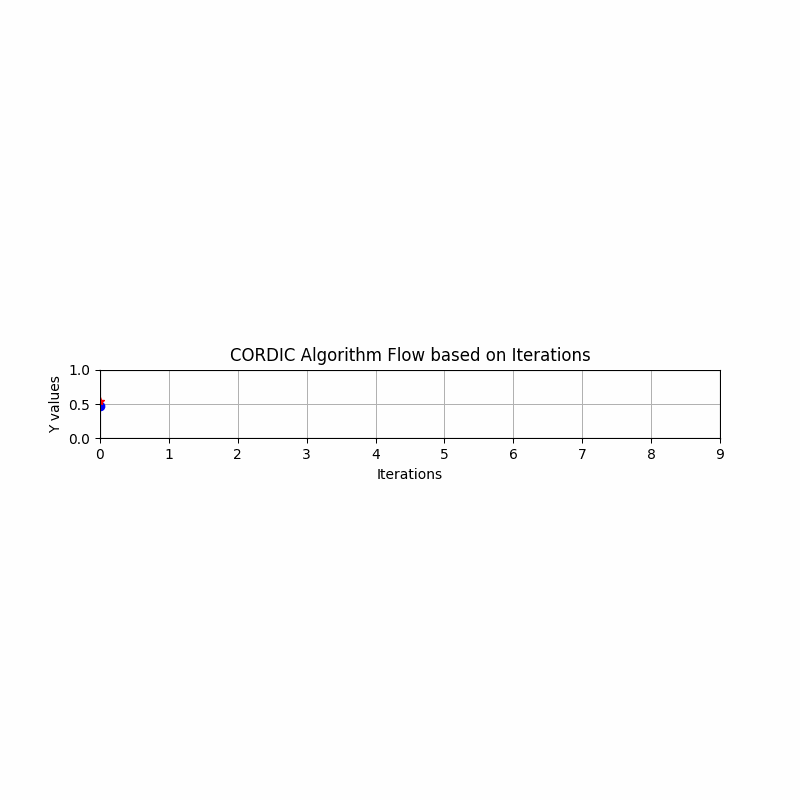

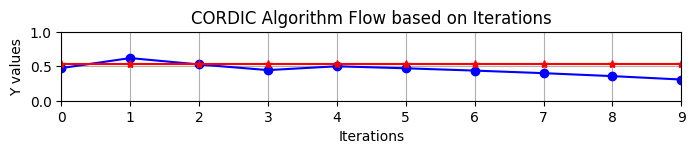

In [ ]:
input =0.6
iteration=10
data=rotation_mode(0.607252935,0,input,-1,iteration)
print (data)
print("orignal tanh is ",np.tanh(input),"\nCordic tanh is ", data['y'][-1]/data['x'][-1])
create_cordic_animation(cordic_data_to_animation_formater(data,"tanh"),[0,iteration-1,0,1],np.tanh(input))

{'x': [0.59375, 0.5, 0.5, 0.5, 0.5], 'y': [0.28125, 0.125, 0.1875, 0.21875, 0.25], 'z': [-0.03125, 0.21875, 0.09375, 0.03125, -0.03125]}
orignal sinh is  [0.52109531] 
Cordic sinh is  0.25
orignal cosh is  [1.12762597] 
Cordic cosh is  0.5
orignal E^z is  [1.64872127] 
 E^z is  1.5
orignal sigmoid is  0.6224593312018546 
Cordic sigmoid is  0.6666666666666666


<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(x_values[:i+1],expect_value)


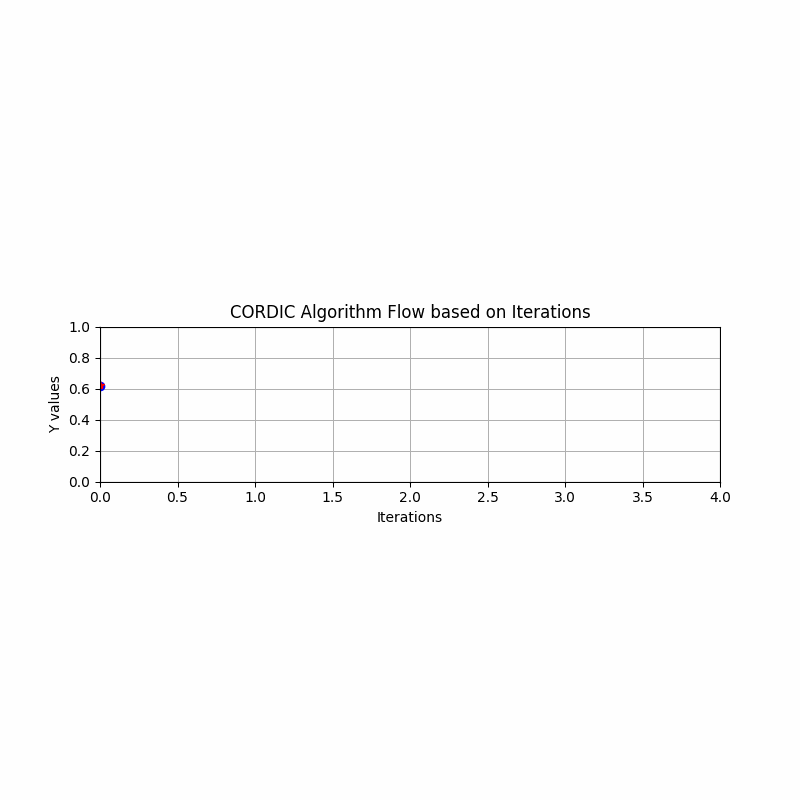

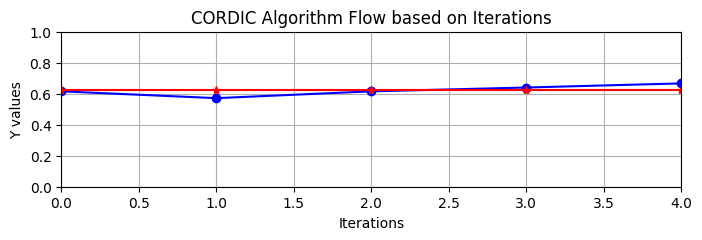

In [ ]:
input =0.5
iteration=5
data=rotation_mode(0.607252935,0,input,-1,iteration)
print (data)
print("orignal sinh is ",np.sinh([input]),"\nCordic sinh is ", data['y'][-1])
print("orignal cosh is ",np.cosh([input]),"\nCordic cosh is ", data['x'][-1])
print("orignal E^z is ",np.exp([input]),"\n E^z is ", (data['x'][-1]+data['y'][-1])*2)

print("orignal sigmoid is ",1/(1+np.exp(-1*input)),"\nCordic sigmoid is ", 1/(1+2*data['x'][-1]-2*data['y'][-1]))
#print (cordic_data_to_animation_formater(data,"sigmoid"))
create_cordic_animation(cordic_data_to_animation_formater(data,"sigmoid"),[0,iteration-1,0,1],1/(1+np.exp(-1*input)))

{'x': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'y': [3.96875, 3.96875, 3.96875, 3.96875, 3.96875, 3.96875, 3.96875, 3.96875, 3.96875, 3.96875], 'z': [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125]}


<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-8-084d71792cfe>:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(x_values[:i+1],expect_value)


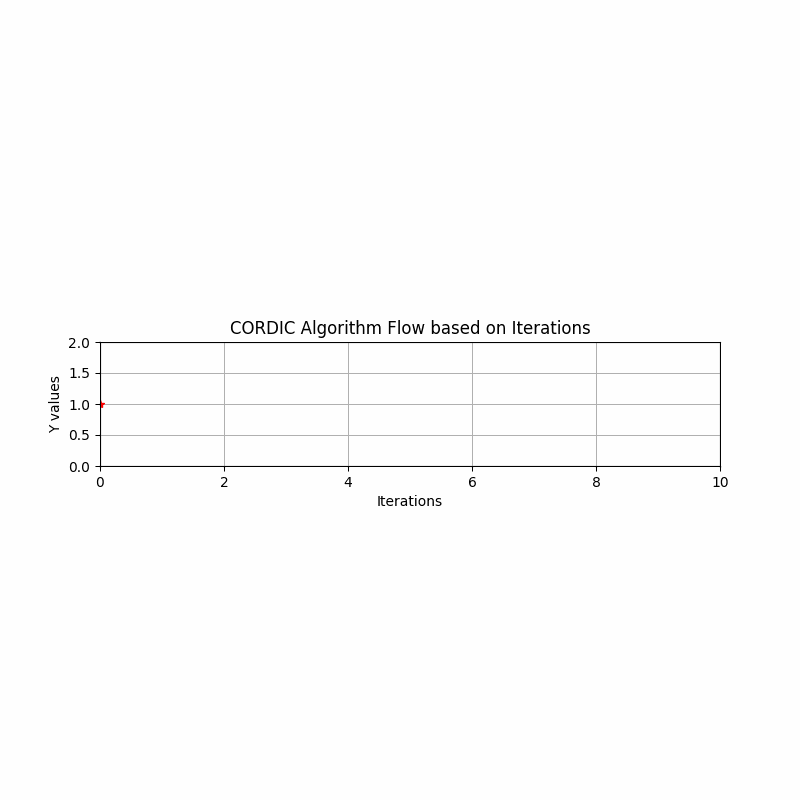

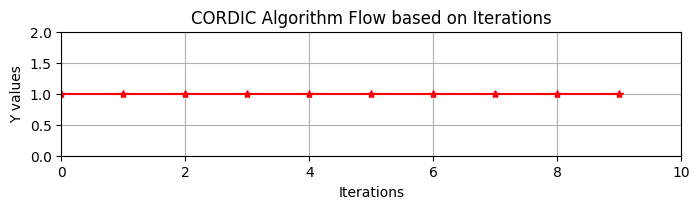

In [ ]:
input1 =0.5
input2 =2
bias=10
iteration=10
data=rotation_mode(input1,bias,input2,0,iteration)
print (data)
#data for mac animation
dfma=[(data['z'][i],i) for i in range(len(data['z']))]
create_cordic_animation(cordic_data_to_animation_formater(data,"MAC"),[0,iteration,0,input1*input2+1],input1*input2)

{'x': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], 'y': [-1.3125, 0.1875, -0.5625, -0.1875, 0.0, -0.09375, -0.03125, 0.0, 0.0], 'z': [1.0, 0.5, 0.75, 0.625, 0.5625, 0.59375, 0.59375, 0.59375, 0.59375]}


<ipython-input-13-2b17ea34a745>:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-13-2b17ea34a745>:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(0,expect_value)
<ipython-input-13-2b17ea34a745>:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  expected_value.set_data(x_values[:i+1],expect_value)


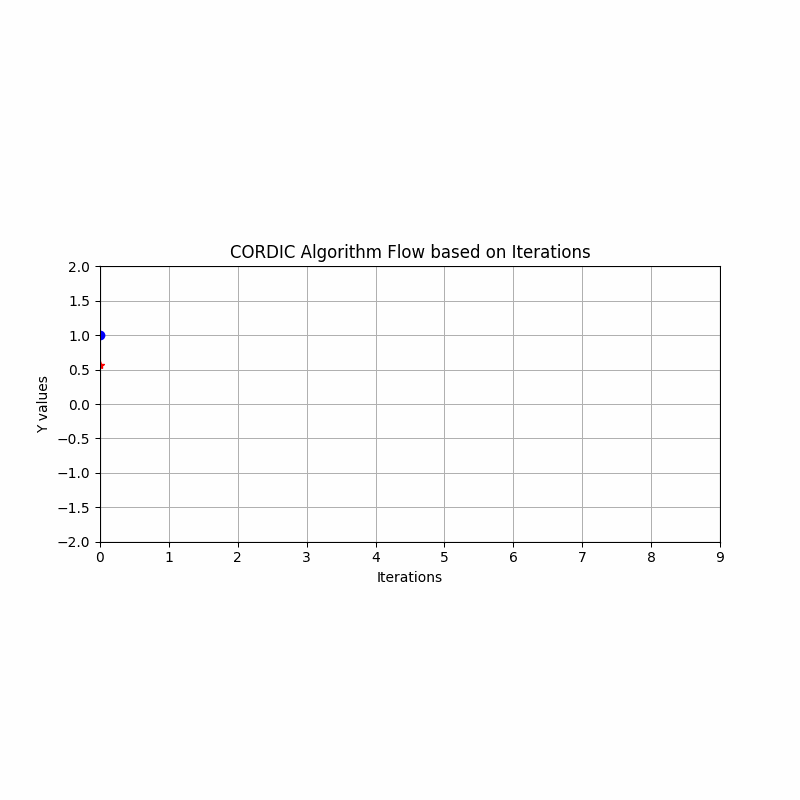

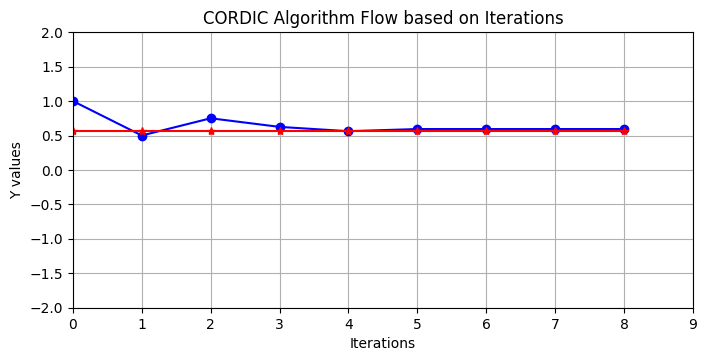

In [ ]:
input1 =3
input2 =1.7
iteration=9
data=rotation_mode(input1,input2,0,0,iteration,1)
print (data)
def create_cordic_animation(cordic_values,xylimit=[-1.1,1.1,-1.1,1.1],expect_value=0, filename='cordic_animation.gif', fps=1):
    x_values, y_values = zip(*cordic_values)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(xylimit[0], xylimit[1])
    ax.set_ylim(xylimit[2], xylimit[3])
    ax.set_title('CORDIC Algorithm Flow based on Iterations')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Y values')
    ax.grid(True)
    ax.set_aspect('equal')
    line, = ax.plot([], [], marker='o', linestyle='-', color='b')
    expected_value, = ax.plot([], [], marker='*', linestyle='-', color='r')
    def init():
        #initialize animation
        line.set_data([], [])
        expected_value.set_data(0,expect_value)
        return line,

    def animate(i):
        #moving to next animation point
        line.set_data(x_values[:i+1], y_values[:i+1])
        expected_value.set_data(x_values[:i+1],expect_value)
        return line,
    ani = animation.FuncAnimation(fig, animate, frames=len(cordic_values), init_func=init, blit=True, repeat=True)
    ani.save(filename, writer='pillow', fps=fps)

    from IPython.display import Image as IPImage
    return IPImage(filename=filename)

create_cordic_animation(cordic_data_to_animation_formater(data,"DIV"),[0,iteration,-2,2],input2/input1)
#y/x= input 2/input 1
#output in z

In [ ]:
input=np.array([1,2,3,4,5,6,7,8,9,10])
input=input /10
iteration=5

def softmax(input,iteration):
  exp_values=[]
  result=[]
  for i in input:
    data=rotation_mode(0.607252935,0,i,-1,iteration)
    #print(data)
    exp_values.append(data['y'][-1]+(data['x'][-1]))
  #print(exp_values)
  sum=np.sum(exp_values)
  for i in exp_values:
    result.append(rotation_mode(sum,i,0,0,iteration,1)['z'][-1])
  #print(result)
  return result

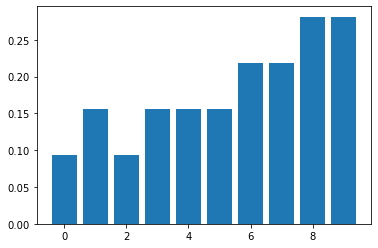

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

input=np.array([1,2,3,4,5,6,7,8,9,10])
input=input /10
iteration=8
result=softmax(input,iteration)
#print(result)
plt.bar(np.arange(len(result)), result)
plt.show()


In [ ]:
orignal=[]
cordic=[]
iterations= 5
count =50
for i in range(1,count):
  for j in range(1,count):
      orignal.append(i/count*j/count)
      cordic.append(rotation_mode(i/count,0,j/count,0,iteration)['y'][-1])
  if (i%25==0):
    print(i)


25


In [ ]:
print (orignal,"\n", cordic)
npor=np.array(orignal)

[0.0004, 0.0008, 0.0012, 0.0016, 0.002, 0.0024, 0.0028000000000000004, 0.0032, 0.0036, 0.004, 0.0044, 0.0048, 0.0052, 0.005600000000000001, 0.006, 0.0064, 0.0068000000000000005, 0.0072, 0.0076, 0.008, 0.0084, 0.0088, 0.0092, 0.0096, 0.01, 0.0104, 0.0108, 0.011200000000000002, 0.0116, 0.012, 0.0124, 0.0128, 0.0132, 0.013600000000000001, 0.014000000000000002, 0.0144, 0.0148, 0.0152, 0.015600000000000001, 0.016, 0.0164, 0.0168, 0.0172, 0.0176, 0.018000000000000002, 0.0184, 0.0188, 0.0192, 0.0196, 0.0008, 0.0016, 0.0024, 0.0032, 0.004, 0.0048, 0.005600000000000001, 0.0064, 0.0072, 0.008, 0.0088, 0.0096, 0.0104, 0.011200000000000002, 0.012, 0.0128, 0.013600000000000001, 0.0144, 0.0152, 0.016, 0.0168, 0.0176, 0.0184, 0.0192, 0.02, 0.0208, 0.0216, 0.022400000000000003, 0.0232, 0.024, 0.0248, 0.0256, 0.0264, 0.027200000000000002, 0.028000000000000004, 0.0288, 0.0296, 0.0304, 0.031200000000000002, 0.032, 0.0328, 0.0336, 0.0344, 0.0352, 0.036000000000000004, 0.0368, 0.0376, 0.0384, 0.0392, 0.001

In [ ]:
from statistics import mean
def compute_error(correct_op,proposed_op):

  maxmacop= max(correct_op)

  D = [x-y for x,y in zip(correct_op, proposed_op)]
  ED = [abs(x-y) for x,y in zip(correct_op, proposed_op)]
  RED = [abs((x-y)/abs(y)) for x,y in zip(correct_op, proposed_op)]

  meanerror= sum(D)/ len(D)
  meanerrordistance = sum(ED)/ len(ED)
  meanrelativeerrordistance = sum(RED)/ len(RED)

  nommralised_mean_error= meanerror /maxmacop
  nommralised_mean_error_distance=  meanerrordistance /maxmacop
  normalised_max_error_distance= max(ED)/maxmacop

  print(max(correct_op))
  print("Normalised Mean Error: " + str(nommralised_mean_error))
  print("Normalised Mean Error Distance : " + str(nommralised_mean_error_distance))
  print("Mean Relative Error Distance: " + str(meanrelativeerrordistance))
  print("Normalised Max Error Distance : " + str(normalised_max_error_distance))


In [ ]:
compute_error(orignal,cordic)

0.9603999999999999
Normalised Mean Error: 0.0875057309003381
Normalised Mean Error Distance : 0.0875057309003381
Mean Relative Error Distance: inf
Normalised Max Error Distance : 0.19866722199083714


/tmp/ipykernel_4468/3506399411.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  RED = [abs((x-y)/abs(y)) for x,y in zip(correct_op, proposed_op)]


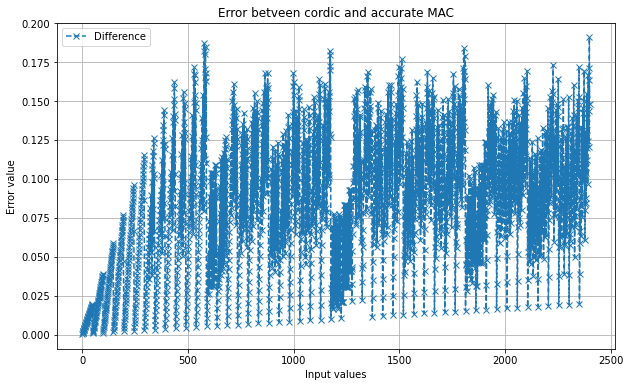

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

difference = [x-y for x,y in zip(orignal ,cordic)]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot data1 and data2
#plt.plot(orignal_sig, 'o-', label='orignal_sig')
#plt.plot(cordic_sig, 's-', label='cordic_sig')

# Plot the difference
plt.plot(difference, 'x--', label='Difference')

# Adding labels and title
plt.xlabel('Input values')
plt.ylabel('Error value')
plt.title('Error betveen cordic and accurate MAC')

# Adding a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

0.7302898704283038
Normalised Mean Error: -0.03385028620309743
Normalised Mean Error Distance : 0.05946325642631673
Mean Relative Error Distance: 0.06719998237389826
Normalised Max Error Distance : 0.1610967827293627


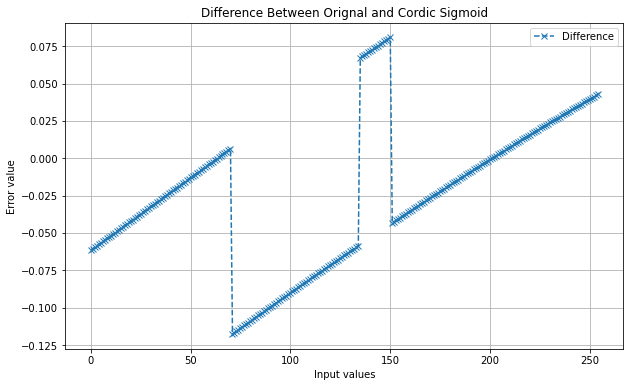

In [ ]:
cordic_sig=[]
orignal_sig=[]
Iteration=5
count=256
for i in range (1,count):
  orignal_sig.append(1/(1+np.exp(-1*i/count)))
  # cordic AF for tanh
  Hyp_output=rotation_mode(0.607252935,0,i/count,-1,Iteration)
  cordic_sig.append(rotation_mode(1+2*(Hyp_output['x'][-1] - Hyp_output['y'][-1]),1,0,0,Iteration,1)['z'][-1])
compute_error(orignal_sig,cordic_sig)
import numpy as np
import matplotlib.pyplot as plt

difference = [x-y for x,y in zip(orignal_sig ,cordic_sig)]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot data1 and data2
#plt.plot(orignal_sig, 'o-', label='orignal_sig')
#plt.plot(cordic_sig, 's-', label='cordic_sig')

# Plot the difference
plt.plot(difference, 'x--', label='Difference')

# Adding labels and title
plt.xlabel('Input values')
plt.ylabel('Error value')
plt.title('Difference Between Orignal and Cordic Sigmoid')

# Adding a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
from statistics import mean
def compute_error(correct_op,proposed_op):

  maxmacop= max(correct_op)
  D = [y-x for x,y in zip(correct_op, proposed_op)]
  sd= [(y-x)**2 for x,y in zip(correct_op, proposed_op)]
  ED = [abs(y-x) for x,y in zip(correct_op, proposed_op)]
  RED = [abs((y-x)/abs(x)) for x,y in zip(correct_op, proposed_op)]
  error_subby_meanerror= [(x-mean(proposed_op))**2 for x in proposed_op]
  mean_square_error= sum(sd)/len(sd)
  mean_absolute_error = sum(ED)/ len(ED) # can also be reffred as
  average_error = sum(RED)/ len(RED)
  Standard_deviation=(sum((error_subby_meanerror))/(len(D)-1))**0.5
  #meanerror= sum(D)/ len(D)
 # add mse
  #nommralised_mean_error= meanerror /maxmacop
  #nommralised_mean_error_distance=  meanerrordistance /maxmacop
  #normalised_max_error_distance= max(ED)/maxmacop
  #print(max(correct_op))
  #print("Normalised Mean Error: " + str(nommralised_mean_error))
  #print("Normalised Mean Error Distance : " + str(nommralised_mean_error_distance))
  #print("Mean Relative Error Distance: " + str(meanrelativeerrordistance))
  #print("Normalised Max Error Distance : " + str(normalised_max_error_distance))
  return [mean_square_error,mean_absolute_error,average_error,Standard_deviation]

def softmax_check(testcases,Iteration=5):
  print("softmax ckeck got inputs testcase count",testcases," iterations",Iteration)
  cordic_softmax=[]
  orignal_softmax=[]
  loss=0
  count=testcases
  for i in range(count):
    #print(i)
    randinput=np.exp(np.random.randint(1, 256, 10))
    randinput=randinput/np.max(randinput)
    #print(randinput)
    softmaxorg=(randinput)/np.sum(randinput)
    orignal_softmax.append(np.argmax(softmaxorg) )
    # cordic softmax
    softmaxcor=softmax(randinput,Iteration)
    cordic_softmax.append(np.argmax(softmaxcor) )
    #[print(x,y) for x,y in zip(softmaxorg,softmaxcor)]
  return compute_error (orignal_softmax,cordic_softmax)

def tanh_check(testcases,Iteration=5):
  print("tanh ckeck got inputs testcase count",testcases," iterations",Iteration)
  cordic_tanh=[]
  orignal_tanh=[]
  count=testcases
  for i in range (1,count):
    orignal_tanh.append(np.tanh(i/count))
    # cordic AF for tanh
    Hyp_output=rotation_mode(0.607252935,0,i/count,-1,Iteration)
    cordic_tanh.append(rotation_mode(Hyp_output['x'][-1],Hyp_output['y'][-1],0,0,Iteration,1)['z'][-1])
  return compute_error (orignal_tanh,cordic_tanh)

def sigmoid_check(testcases,Iteration=5):
  print("sigmoid ckeck got inputs testcase count",testcases," iterations",Iteration)
  cordic_sig=[]
  orignal_sig=[]
  count=testcases
  cordic_sig=[]
  for i in range (1,count):
    orignal_sig.append(1/(1+np.exp(-1*i/count)))
    Hyp_output=rotation_mode(0.607252935,0,i/count,-1,Iteration)
    cordic_sig.append(rotation_mode(1+2*(Hyp_output['x'][-1] - Hyp_output['y'][-1]),1,0,0,Iteration,1)['z'][-1])
  return compute_error (orignal_sig,cordic_sig)

def mac_check(testcases,Iteration=5):
  print("mac ckeck got inputs testcase count",testcases," iterations",Iteration)
  cordic=[]
  orignal=[]

  for i in range(1,testcases):
    tp=np.random.randint(1, size=3)
    orignal.append(tp[0]*tp[1]+tp[2])
    cordic.append(rotation_mode(tp[0],tp[2],tp[1],0,iteration)['y'][-1])
    if (i%500==0):
      print("completed ",i," cases of mac paareto")
  return compute_error(orignal,cordic)


In [ ]:
import numpy as np
!pip install joblib

from joblib import Parallel, delayed

def mac_check(testcases, Iteration=5):
    print("mac check got inputs testcase count", testcases, "iterations", Iteration)

    def process_case(i):
        tp = np.random.randint(1, size=3)
        original_value = tp[0] * tp[1] + tp[2]
        cordic_value = rotation_mode(tp[0], tp[2], tp[1], 0, Iteration)['y'][-1]
        return original_value, cordic_value

    results = Parallel(n_jobs=-1)(delayed(process_case)(i) for i in range(testcases))

    # Unpack results
    original_values, cordic_values = zip(*results)

    # Print progress every 500 cases
    for i in range(500, testcases, 500):
        print("Completed", i, "cases of mac Pareto")

    return compute_error(original_values, cordic_values)



Defaulting to user installation because normal site-packages is not writeable


In [ ]:
def pareto_4bit(testcases=256):
  softmax_4bit_error=[]
  tanh_4bit_error=[]
  sigmoid_4bit_error=[]
  mac_4bit_error=[]
  for i in range(2,5):
    print("Iteration", i)
    softmax_4bit_error.append(softmax_check(testcases,i))
    tanh_4bit_error.append(tanh_check(testcases,i))
    sigmoid_4bit_error.append(sigmoid_check(testcases,i))
    mac_4bit_error.append(mac_check(16*16*16,i))
  return [softmax_4bit_error,tanh_4bit_error,sigmoid_4bit_error,mac_4bit_error]
def pareto_8bit(testcases=256):
  softmax_8bit_error=[]
  tanh_8bit_error=[]
  sigmoid_8bit_error=[]
  mac_8bit_error=[]
  for i in range(2,9):
    print("Iteration", i)
    softmax_8bit_error.append(softmax_check(testcases,i))
    tanh_8bit_error.append(tanh_check(testcases,i))
    sigmoid_8bit_error.append(sigmoid_check(testcases,i))
    mac_8bit_error.append(mac_check(12500,i))
  return [softmax_8bit_error,tanh_8bit_error,sigmoid_8bit_error]#,mac_8bit_error]
def pareto_16bit(testcases=256):
  softmax_16bit_error=[]
  tanh_16bit_error=[]
  sigmoid_16bit_error=[]
  mac_16bit_error=[]
  for i in range(2,17):
    print("Iteration", i)
    softmax_16bit_error.append(softmax_check(testcases,i))
    tanh_16bit_error.append(tanh_check(testcases,i))
    sigmoid_16bit_error.append(sigmoid_check(testcases,i))
    mac_16bit_error.append(mac_check(12500,i))
  return [softmax_16bit_error,tanh_16bit_error,sigmoid_16bit_error]
def pareto_32bit(testcases=256):
  softmax_32bit_error=[]
  tanh_32bit_error=[]
  sigmoid_32bit_error=[]
  mac_32bit_error=[]
  for i in range(2,33):
    print("Iteration", i)
    softmax_32bit_error.append(softmax_check(testcases,i))
    tanh_32bit_error.append(tanh_check(testcases,i))
    sigmoid_32bit_error.append(sigmoid_check(testcases,i))
    mac_32bit_error.append(mac_check(12500,i))
  return [softmax_32bit_error,tanh_32bit_error,sigmoid_32bit_error]

In [ ]:
bit4_error=pareto_4bit(16)

Iteration 2
softmax ckeck got inputs testcase count 16  iterations 2


/tmp/ipykernel_4468/2258776814.py:9: RuntimeWarning: invalid value encountered in scalar divide
  RED = [abs((y-x)/abs(x)) for x,y in zip(correct_op, proposed_op)]


tanh ckeck got inputs testcase count 16  iterations 2
sigmoid ckeck got inputs testcase count 16  iterations 2
mac check got inputs testcase count 4096 iterations 2
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Iteration 3
softmax ckeck got inputs testcase count 16  iterations 3
tanh ckeck got inputs testcase count 16  iterations 3
sigmoid ckeck got inputs testcase count 16  iterations 3
mac check got inputs testcase count 4096 iterations 3
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Iteration 4
softmax ckeck got inputs testca

In [ ]:
!pip install pandas==2.2.2
import pandas as pd

try:
    # Check if pandas imports successfully
    pd.__version__  # Accessing an attribute triggers import checks
except ImportError as e:
    # If pandas import fails, extract numpy version info
    import re
    match = re.search(r"numpy < ([\d.]+)", str(e))
    if match:
        required_numpy_version = match.group(1)
        print(f"Pandas requires numpy >= {required_numpy_version}. Installing...")
        !pip install "numpy>={required_numpy_version}"
    else:
        print("Could not determine required numpy version. Please install manually.")
        print("Refer to the pandas documentation for compatibility information.")
    # Restart the kernel or runtime after installing numpy
else:
    # If pandas import succeeded, proceed
    print(f"Pandas version {pd.__version__} loaded successfully.")
    # ... your existing code ...

Defaulting to user installation because normal site-packages is not writeable
Pandas version 2.2.2 loaded successfully.


In [ ]:
!pip install openpyxl

import pandas as pd
# Assuming bit4_error is a list of lists, where each inner list contains error metrics
# [softmax_errors, tanh_errors, sigmoid_errors, mac_errors]
# and each error list contains [mean_square_error, mean_absolute_error, average_error, standard_deviation] for different iterations

# Create a DataFrame for each activation function
df_softmax = pd.DataFrame(bit4_error[0], columns=['MSE', 'MAE', 'Avg Error', 'Std Dev'])
df_tanh = pd.DataFrame(bit4_error[1], columns=['MSE', 'MAE', 'Avg Error', 'Std Dev'])
df_sigmoid = pd.DataFrame(bit4_error[2], columns=['MSE', 'MAE', 'Avg Error', 'Std Dev'])
df_mac = pd.DataFrame(bit4_error[3], columns=['MSE', 'MAE', 'Avg Error', 'Std Dev'])

# Add iteration column
df_softmax['Iterations'] = range(2, 2 + len(df_softmax))
df_tanh['Iterations'] = range(2, 2 + len(df_tanh))
df_sigmoid['Iterations'] = range(2, 2 + len(df_sigmoid))
df_mac['Iterations'] = range(2, 2 + len(df_mac))

# Write to Excel file with multiple sheets
with pd.ExcelWriter('bit4_errors.xlsx') as writer:
    df_softmax.to_excel(writer, sheet_name='Softmax', index=False)
    df_tanh.to_excel(writer, sheet_name='Tanh', index=False)
    df_sigmoid.to_excel(writer, sheet_name='Sigmoid', index=False)
    df_mac.to_excel(writer, sheet_name='MAC', index=False)

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from joblib import Parallel, delayed
import numpy as np

def mean_square_error(correct_op, proposed_op):
    sd = [(y - x) ** 2 for x, y in zip(correct_op, proposed_op)]
    return sum(sd) / len(sd)

def mean_absolute_error(correct_op, proposed_op):
    ED = [abs(y - x) for x, y in zip(correct_op, proposed_op)]
    return sum(ED) / len(ED)

def average_error(correct_op, proposed_op):
    RED = [abs((y - x) / abs(x)) for x, y in zip(correct_op, proposed_op)]
    return sum(RED) / len(RED)

def standard_deviation(correct_op, proposed_op):
    D = [y - x for x, y in zip(correct_op, proposed_op)]
    error_subby_meanerror = [(x - np.mean(proposed_op)) ** 2 for x in proposed_op]
    return (sum(error_subby_meanerror) / (len(D) - 1)) ** 0.5

def compute_error(correct_op, proposed_op):
    # List of functions to compute
    tasks = [
        (mean_square_error, (correct_op, proposed_op)),
        (mean_absolute_error, (correct_op, proposed_op)),
        (average_error, (correct_op, proposed_op)),
        (standard_deviation, (correct_op, proposed_op))
    ]

    # Use joblib to run tasks in parallel
    results = Parallel(n_jobs=-1)(delayed(func)(*args) for func, args in tasks)

    return results

# Example usage
correct_op = [1, 2, 3, 4, 5]
proposed_op = [1.1, 2.1, 2.9, 4.1, 4.8]

print(compute_error(correct_op, proposed_op))


[0.016000000000000007, 0.12000000000000002, 0.049666666666666685, 1.489966442575134]


In [ ]:
pip list

Package                    Version
-------------------------- ----------------
appdirs                    1.4.4
apturl                     0.5.2
argon2-cffi                21.1.0
attrs                      21.2.0
Babel                      2.15.0
backcall                   0.2.0
bcrypt                     3.2.0
beautifulsoup4             4.10.0
beniget                    0.4.1
bleach                     4.1.0
blinker                    1.4
Brlapi                     0.8.3
Brotli                     1.0.9
certifi                    2020.6.20
chardet                    4.0.0
charset-normalizer         3.3.2
click                      8.0.3
colorama                   0.4.4
command-not-found          0.3
cryptography               3.4.8
cupshelpers                1.0
cycler                     0.11.0
dbus-python                1.2.18
decorator                  4.4.2
defer                      1.0.6
defusedxml                 0.7.1
distro                     1.7.0
distro-info               

# 8-BIT pareto


In [ ]:
bit8_error=pareto_8bit(256)

Iteration 2
softmax ckeck got inputs testcase count 256  iterations 2


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 2
sigmoid ckeck got inputs testcase count 256  iterations 2
mac check got inputs testcase count 12500 iterations 2
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 3
softmax ckeck got inputs testcase count 256  iterations 3


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 3
sigmoid ckeck got inputs testcase count 256  iterations 3
mac check got inputs testcase count 12500 iterations 3
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 4
softmax ckeck got inputs testcase count 256  iterations 4


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 4
sigmoid ckeck got inputs testcase count 256  iterations 4
mac check got inputs testcase count 12500 iterations 4
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 5
softmax ckeck got inputs testcase count 256  iterations 5


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 5
sigmoid ckeck got inputs testcase count 256  iterations 5
mac check got inputs testcase count 12500 iterations 5
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 6
softmax ckeck got inputs testcase count 256  iterations 6


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 6
sigmoid ckeck got inputs testcase count 256  iterations 6
mac check got inputs testcase count 12500 iterations 6
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 7
softmax ckeck got inputs testcase count 256  iterations 7


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 7
sigmoid ckeck got inputs testcase count 256  iterations 7
mac check got inputs testcase count 12500 iterations 7
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 8
softmax ckeck got inputs testcase count 256  iterations 8


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 256  iterations 8
sigmoid ckeck got inputs testcase count 256  iterations 8
mac check got inputs testcase count 12500 iterations 8
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 cases of

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


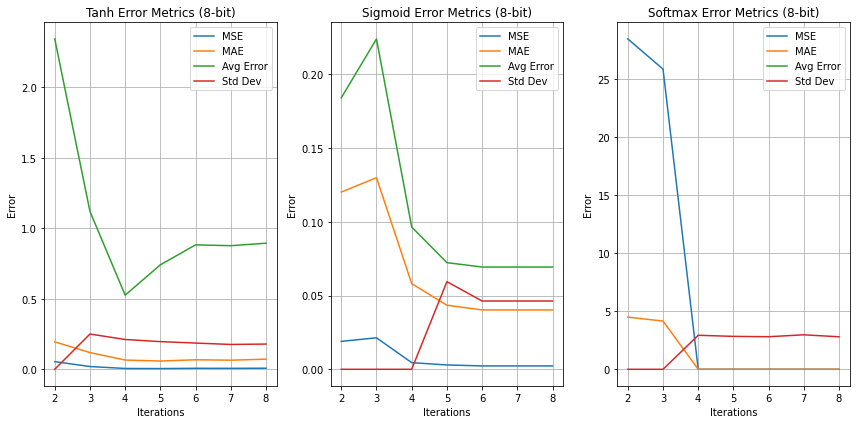

In [ ]:
# prompt: using bit8_error plot mean 1.  mean_square_erro,   mean_absolute_error,   average_error  Standard_deviation on diffrent graphs for tanh,sigmoid and softmax

# Extract data for plotting
iterations = range(2, 9)  # Iterations for 8-bit

# Initialize lists to store error metrics for each activation function
tanh_mse = []
tanh_mae = []
tanh_avg_error = []
tanh_std_dev = []

sigmoid_mse = []
sigmoid_mae = []
sigmoid_avg_error = []
sigmoid_std_dev = []

softmax_mse = []
softmax_mae = []
softmax_avg_error = []
softmax_std_dev = []

# Extract error metrics from bit8_error
for i in range(len(iterations)):
    softmax_mse.append(bit8_error[0][i][0])
    softmax_mae.append(bit8_error[0][i][1])
    softmax_avg_error.append(bit8_error[0][i][2])
    softmax_std_dev.append(bit8_error[0][i][3])

    tanh_mse.append(bit8_error[1][i][0])
    tanh_mae.append(bit8_error[1][i][1])
    tanh_avg_error.append(bit8_error[1][i][2])
    tanh_std_dev.append(bit8_error[1][i][3])

    sigmoid_mse.append(bit8_error[2][i][0])
    sigmoid_mae.append(bit8_error[2][i][1])
    sigmoid_avg_error.append(bit8_error[2][i][2])
    sigmoid_std_dev.append(bit8_error[2][i][3])

# Plotting
plt.figure(figsize=(12, 6))

# Tanh
plt.subplot(1, 3, 1)
plt.plot(iterations, tanh_mse, label='MSE')
plt.plot(iterations, tanh_mae, label='MAE')
plt.plot(iterations, tanh_avg_error, label='Avg Error')
plt.plot(iterations, tanh_std_dev, label='Std Dev')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Tanh Error Metrics (8-bit)')
plt.legend()
plt.grid(True)

# Sigmoid
plt.subplot(1, 3, 2)
plt.plot(iterations, sigmoid_mse, label='MSE')
plt.plot(iterations, sigmoid_mae, label='MAE')
plt.plot(iterations, sigmoid_avg_error, label='Avg Error')
plt.plot(iterations, sigmoid_std_dev, label='Std Dev')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Sigmoid Error Metrics (8-bit)')
plt.legend()
plt.grid(True)

# Softmax
plt.subplot(1, 3, 3)
plt.plot(iterations, softmax_mse, label='MSE')
plt.plot(iterations, softmax_mae, label='MAE')
plt.plot(iterations, softmax_avg_error, label='Avg Error')
plt.plot(iterations, softmax_std_dev, label='Std Dev')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Softmax Error Metrics (8-bit)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import math
#ROM_lookup provides values of constant required for each coordinate system based on iteration count
hyperbolic=-1
linear=0
circular=1
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return Fxp(math.degrees(math.atan(2**(-1*iteration))), signed=True, n_word=4, n_frac=2) ################################################
    elif (coordinate == linear):
        #print("linear mode return",2**(-1*iteration),"inputs iteration",iteration)
        return Fxp(2**(-1*iteration), signed=True, n_word=4, n_frac=2)
    elif (coordinate == hyperbolic):
        return Fxp(math.atanh(2**(-1*iteration)), signed=True, n_word=4, n_frac=2)
#Rotation_mode returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(p, q, r, coordinate, iterations,division=0):
    x=Fxp(p, signed=True, n_word=4, n_frac=2)
    y=Fxp(q, signed=True, n_word=4, n_frac=2)
    z=Fxp(r, signed=True, n_word=4, n_frac=2)

    a = Fxp(0.607252935, signed=True, n_word=4, n_frac=2);   # = 1/K

    x_val_list = []
    y_val_list = []
    z_val_list = []

    i = 0;                  # Keeps count on number of iterations

    current_x = x.copy()         # Value of X on ith iteration
    current_y = y.copy()         # Value of Y on ith iteration
    current_z = z.copy()         # Value of Z on ith iteration

    di = 0

    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0

    flag = 0

    if (iterations > 0):
        while (i < iterations):
            #print(i)
            if division ==0:
              if (current_z < 0):
                  di = -1
              else:
                  di = +1
            else:
              if ((current_x.get_val() < 0) == (current_y.get_val() < 0)):
                  di = -1
              else:
                  di = 1
            next_z = Fxp( current_z.get_val() - di * ROM_lookup(i, coordinate))

            next_x = Fxp(current_x.get_val() - coordinate * di * current_y.get_val() * (2**(-1*i)))
            next_y = Fxp(current_y.get_val() + di * current_x.get_val() * 2**(-1*i))

            #print(next_x.get_val())
            #print(next_y.get_val())
            #print(next_z.get_val())
            current_x.equal(next_x.get_val()) # cosh in hyperbolic
            current_y.equal(next_y.get_val()) # sinh in hyperbolic
            current_z.equal(next_z.get_val())

            #print(current_x.info(verbose=3))
            #print(current_y.info(verbose=3))
            #print(current_z.info(verbose=3))

            x_val_list.append(current_x.get_val())
            y_val_list.append(current_y.get_val())
            z_val_list.append(current_z.get_val())

            #print(x_val_list[0][0])
            #print(y_val_list[0])
            #print(z_val_list)
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list }


In [ ]:
print(bit8_error)

[[[28.5, 4.5, nan, 0.0], [25.89453125, 4.16015625, nan, 0.0], [0.0, 0.0, nan, 2.9334008737768027], [0.0, 0.0, nan, 2.8389550989618644], [0.0, 0.0, nan, 2.809535474652942], [0.0, 0.0, nan, 2.97396536218736], [0.0, 0.0, nan, 2.8035533082074227]], [[0.05421641085035969, 0.19468047269328137, 2.342994841951905, 0.0], [0.019527809722343716, 0.11833346818401122, 1.1190882141487513, 0.2500578904720043], [0.005771052679859101, 0.06549391571582448, 0.5257098570858617, 0.21137923161568467], [0.005136090621146859, 0.05850700759883979, 0.7409057676908766, 0.19613468005923693], [0.006960804007413339, 0.06743180589134465, 0.8823688934507411, 0.1859519362298166], [0.00665966801857429, 0.06445865626504646, 0.8765705740414658, 0.17611359663368606], [0.007604446140634979, 0.07181072250927104, 0.8941099521150557, 0.1788766993003018]], [[0.018911134954664524, 0.12013242005124955, 0.18404092331787486, 0.0], [0.021344924929039732, 0.12986757994875048, 0.2239386150231875, 0.0], [0.004503029941852133, 0.058058

In [ ]:
# prompt: write and store the bit8_error and bit 4 error into a file into some tabular format

import pandas as pd

# Assuming bit8_error and bit4_error are lists of lists as described in the problem

# Convert the data to pandas DataFrames for easier manipulation
df_8bit = pd.DataFrame(bit8_error).transpose()
df_4bit = pd.DataFrame(bit4_error).transpose()

# Add column names for clarity
df_8bit.columns = ['Softmax', 'Tanh', 'Sigmoid']  # , 'MAC' if MAC is included
df_4bit.columns = ['Softmax', 'Tanh', 'Sigmoid', 'MAC']

# Write the DataFrames to CSV files
df_8bit.to_csv('bit8_error.csv', index=False)
df_4bit.to_csv('bit4_error.csv', index=False)

print("Data written to bit8_error.csv and bit4_error.csv")


Data written to bit8_error.csv and bit4_error.csv


# 16 bit

MSE-MAC, MSE-Softmax, MAE-MAC, MAE-Softmax, AvgError-MAC, AvgError-Softmax
fxp 4-bit, 8-bit, 16-bit, 32-bit

MSE-Tanh, MSE-Sigmoid, MAE-Tanh, MAE-Sigmoid, AvgError-Tanh, AvgError-Sigmoid fxp 4-bit, 8-bit, 16-bit, 32-bit

In [ ]:
import numpy as np
import math
#ROM_lookup provides values of constant required for each coordinate system based on iteration count
hyperbolic=-1
linear=0
circular=1
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return Fxp(math.degrees(math.atan(2**(-1*iteration))), signed=True, n_word=16, n_frac=11) ################################################
    elif (coordinate == linear):
        #print("linear mode return",2**(-1*iteration),"inputs iteration",iteration)
        return Fxp(2**(-1*iteration), signed=True, n_word=16, n_frac=11)
    elif (coordinate == hyperbolic):
        return Fxp(math.atanh(2**(-1*iteration)), signed=True, n_word=16, n_frac=11)
#Rotation_mode returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(p, q, r, coordinate, iterations,division=0):
    x=Fxp(p, signed=True, n_word=16, n_frac=11)
    y=Fxp(q, signed=True, n_word=16, n_frac=11)
    z=Fxp(r, signed=True, n_word=16, n_frac=11)

    a = Fxp(0.607252935, signed=True, n_word=16, n_frac=11);   # = 1/K

    x_val_list = []
    y_val_list = []
    z_val_list = []

    i = 0;                  # Keeps count on number of iterations

    current_x = x.copy()         # Value of X on ith iteration
    current_y = y.copy()         # Value of Y on ith iteration
    current_z = z.copy()         # Value of Z on ith iteration

    di = 0

    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0

    flag = 0

    if (iterations > 0):
        while (i < iterations):
            #print(i)
            if division ==0:
              if (current_z < 0):
                  di = -1
              else:
                  di = +1
            else:
              if ((current_x.get_val() < 0) == (current_y.get_val() < 0)):
                  di = -1
              else:
                  di = 1
            next_z = Fxp( current_z.get_val() - di * ROM_lookup(i, coordinate))

            next_x = Fxp(current_x.get_val() - coordinate * di * current_y.get_val() * (2**(-1*i)))
            next_y = Fxp(current_y.get_val() + di * current_x.get_val() * 2**(-1*i))

            #print(next_x.get_val())
            #print(next_y.get_val())
            #print(next_z.get_val())
            current_x.equal(next_x.get_val()) # cosh in hyperbolic
            current_y.equal(next_y.get_val()) # sinh in hyperbolic
            current_z.equal(next_z.get_val())

            #print(current_x.info(verbose=3))
            #print(current_y.info(verbose=3))
            #print(current_z.info(verbose=3))

            x_val_list.append(current_x.get_val())
            y_val_list.append(current_y.get_val())
            z_val_list.append(current_z.get_val())

            #print(x_val_list[0][0])
            #print(y_val_list[0])
            #print(z_val_list)
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list }


In [ ]:
bit16_error=pareto_16bit(10000)

Iteration 2
softmax ckeck got inputs testcase count 10000  iterations 2


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 2
sigmoid ckeck got inputs testcase count 10000  iterations 2
mac check got inputs testcase count 12500 iterations 2
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 3
softmax ckeck got inputs testcase count 10000  iterations 3


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 3
sigmoid ckeck got inputs testcase count 10000  iterations 3
mac check got inputs testcase count 12500 iterations 3
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 4
softmax ckeck got inputs testcase count 10000  iterations 4


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 4
sigmoid ckeck got inputs testcase count 10000  iterations 4
mac check got inputs testcase count 12500 iterations 4
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 5
softmax ckeck got inputs testcase count 10000  iterations 5


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 5
sigmoid ckeck got inputs testcase count 10000  iterations 5
mac check got inputs testcase count 12500 iterations 5
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 6
softmax ckeck got inputs testcase count 10000  iterations 6


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 6
sigmoid ckeck got inputs testcase count 10000  iterations 6
mac check got inputs testcase count 12500 iterations 6
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 7
softmax ckeck got inputs testcase count 10000  iterations 7


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 7
sigmoid ckeck got inputs testcase count 10000  iterations 7
mac check got inputs testcase count 12500 iterations 7
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 8
softmax ckeck got inputs testcase count 10000  iterations 8


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 8
sigmoid ckeck got inputs testcase count 10000  iterations 8
mac check got inputs testcase count 12500 iterations 8
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 9
softmax ckeck got inputs testcase count 10000  iterations 9


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 9
sigmoid ckeck got inputs testcase count 10000  iterations 9
mac check got inputs testcase count 12500 iterations 9
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 case

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 10
softmax ckeck got inputs testcase count 10000  iterations 10


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 10
sigmoid ckeck got inputs testcase count 10000  iterations 10
mac check got inputs testcase count 12500 iterations 10
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 11
softmax ckeck got inputs testcase count 10000  iterations 11


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 11
sigmoid ckeck got inputs testcase count 10000  iterations 11
mac check got inputs testcase count 12500 iterations 11
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 12
softmax ckeck got inputs testcase count 10000  iterations 12


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 12
sigmoid ckeck got inputs testcase count 10000  iterations 12
mac check got inputs testcase count 12500 iterations 12
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 13
softmax ckeck got inputs testcase count 10000  iterations 13


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 13
sigmoid ckeck got inputs testcase count 10000  iterations 13
mac check got inputs testcase count 12500 iterations 13
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 14
softmax ckeck got inputs testcase count 10000  iterations 14


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 14
sigmoid ckeck got inputs testcase count 10000  iterations 14
mac check got inputs testcase count 12500 iterations 14
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 15
softmax ckeck got inputs testcase count 10000  iterations 15


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 15
sigmoid ckeck got inputs testcase count 10000  iterations 15
mac check got inputs testcase count 12500 iterations 15
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


Iteration 16
softmax ckeck got inputs testcase count 10000  iterations 16


/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


tanh ckeck got inputs testcase count 10000  iterations 16
sigmoid ckeck got inputs testcase count 10000  iterations 16
mac check got inputs testcase count 12500 iterations 16
Completed 500 cases of mac Pareto
Completed 1000 cases of mac Pareto
Completed 1500 cases of mac Pareto
Completed 2000 cases of mac Pareto
Completed 2500 cases of mac Pareto
Completed 3000 cases of mac Pareto
Completed 3500 cases of mac Pareto
Completed 4000 cases of mac Pareto
Completed 4500 cases of mac Pareto
Completed 5000 cases of mac Pareto
Completed 5500 cases of mac Pareto
Completed 6000 cases of mac Pareto
Completed 6500 cases of mac Pareto
Completed 7000 cases of mac Pareto
Completed 7500 cases of mac Pareto
Completed 8000 cases of mac Pareto
Completed 8500 cases of mac Pareto
Completed 9000 cases of mac Pareto
Completed 9500 cases of mac Pareto
Completed 10000 cases of mac Pareto
Completed 10500 cases of mac Pareto
Completed 11000 cases of mac Pareto
Completed 11500 cases of mac Pareto
Completed 12000 c

/tmp/ipykernel_153306/3317639579.py:13: RuntimeWarning: invalid value encountered in scalar divide


In [ ]:
# prompt: write and store the bit 16 error into a file into some tabular format

import pandas as pd

# Assuming bit16_error is a list of lists as described in the problem

# Convert the data to a pandas DataFrame for easier manipulation
df_16bit = pd.DataFrame(bit16_error).transpose()

# Add column names for clarity
df_16bit.columns = ['Softmax', 'Tanh', 'Sigmoid']  # , 'MAC' if MAC is included

# Write the DataFrame to a CSV file
df_16bit.to_csv('bit16_error.csv', index=False)

print("Data written to bit16_error.csv")


Data written to bit16_error.csv


# 32 bits

In [ ]:
import numpy as np
import math
#ROM_lookup provides values of constant required for each coordinate system based on iteration count
hyperbolic=-1
linear=0
circular=1
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return Fxp(math.degrees(math.atan(2**(-1*iteration))), signed=True, n_word=32, n_frac=26) ################################################
    elif (coordinate == linear):
        #print("linear mode return",2**(-1*iteration),"inputs iteration",iteration)
        return Fxp(2**(-1*iteration), signed=True, n_word=32, n_frac=26)
    elif (coordinate == hyperbolic):
        return Fxp(math.atanh(2**(-1*iteration)), signed=True, n_word=32, n_frac=26)
#Rotation_mode returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(p, q, r, coordinate, iterations,division=0):
    x=Fxp(p, signed=True, n_word=32, n_frac=26)
    y=Fxp(q, signed=True, n_word=32, n_frac=26)
    z=Fxp(r, signed=True, n_word=32, n_frac=26)

    a = Fxp(0.607252935, signed=True, n_word=32, n_frac=26);   # = 1/K

    x_val_list = []
    y_val_list = []
    z_val_list = []

    i = 0;                  # Keeps count on number of iterations

    current_x = x.copy()         # Value of X on ith iteration
    current_y = y.copy()         # Value of Y on ith iteration
    current_z = z.copy()         # Value of Z on ith iteration

    di = 0

    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0

    flag = 0

    if (iterations > 0):
        while (i < iterations):
            #print(i)
            if division ==0:
              if (current_z < 0):
                  di = -1
              else:
                  di = +1
            else:
              if ((current_x.get_val() < 0) == (current_y.get_val() < 0)):
                  di = -1
              else:
                  di = 1
            next_z = Fxp( current_z.get_val() - di * ROM_lookup(i, coordinate))

            next_x = Fxp(current_x.get_val() - coordinate * di * current_y.get_val() * (2**(-1*i)))
            next_y = Fxp(current_y.get_val() + di * current_x.get_val() * 2**(-1*i))

            #print(next_x.get_val())
            #print(next_y.get_val())
            #print(next_z.get_val())
            current_x.equal(next_x.get_val()) # cosh in hyperbolic
            current_y.equal(next_y.get_val()) # sinh in hyperbolic
            current_z.equal(next_z.get_val())

            #print(current_x.info(verbose=3))
            #print(current_y.info(verbose=3))
            #print(current_z.info(verbose=3))

            x_val_list.append(current_x.get_val())
            y_val_list.append(current_y.get_val())
            z_val_list.append(current_z.get_val())

            #print(x_val_list[0][0])
            #print(y_val_list[0])
            #print(z_val_list)
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list }


In [ ]:
bit32_error=pareto_32bit(10000)

Iteration 2
softmax ckeck got inputs testcase count 10000  iterations 2


KeyboardInterrupt: 

In [ ]:
# prompt: write and store the bit 32 error into a file into some tabular format

# Assuming bit32_error is a list of lists as described in the problem

# Convert the data to a pandas DataFrame for easier manipulation
df_32bit = pd.DataFrame(bit32_error).transpose()

# Add column names for clarity
df_32bit.columns = ['Softmax', 'Tanh', 'Sigmoid']  # , 'MAC' if MAC is included

# Write the DataFrame to a CSV file
df_32bit.to_csv('bit32_error.csv', index=False)

print("Data written to bit32_error.csv")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plotting the first part with a y-axis break
ax1.plot(x, y)
ax1.set_ylim(80, 100)  # upper part
ax2.plot(x, y)
ax2.set_ylim(50, 65)   # lower part

# Remove the unwanted space
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Diagonal lines for the break
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()
